<span style="color: black; font-size: 30px;">Pós Tech Fiap - Tech Challenge Fase 1</span>

<span style="color: black; font-size: 25px;">Aplicando Modelo de aprendizagem de máquina para Previsão de Custos Médicos</span>

<span style="color: black; font-size: 20px;">Grupo 56</span>
* Araguacy Bezerra Pereira    RM362367
* Emerson Vitorio de Oliveira RM362731
* Jonas Lisboa Silva          RM362907
* Robson Carvalho Calixto     RM362870
* Vinicius Fernando M. Costa  RM363007


> Vamos a uma explicação rápida sobre as etapas de um projetos de Machine Learning
> 
Podemos dividir o Processo de Ciência de Dados nas seguintes etapas:

* 1 - Definição do Problema
* 2 - Carga e Compreensão Geral dos Dados
* 3 - Análise Exploratória / Pré-Processamento dos Dados
* 4 - Modelagem
* 5 - Deploy do Modelo

> Vamos então para Hands on

<span style="color: black; font-size: 30px;">1 - Definição do Problema de negócio</span>

**Quais fatores mais influenciam no custo médico**

<span style="color: black; font-size: 16px;">Fonte dos dados: https://www.kaggle.com/code/keremkarayaz/medical-insurance-prediction-94/input </span>

<span style="color: black; font-size: 16px;">Descrição dos dados</span>

- Age - Idade do cliente
- Diabetes - Se a pessoa tem níveis anormais de açúcar no sangue
- BloodPressureProblems - Se a pessoa tem níveis anormais de pressão arterial
- AnyTransplants - Qualquer transplante de órgão importante          
- AnyChronicDiseases - Se o cliente sofre de doenças crônicas como asma       
- Height - Altura do cliente                  
- Weight - Peso do Cliente                   
- KnownAllergies - Se o cliente tem alguma alergia conhecida          
- HistoryOfCancerInFamily - Se algum parente consanguíneo do cliente teve algum tipo de câncer  
- NumberOfMajorSurgeries - O número de cirurgias importantes que a pessoa passou  
- PremiumPrice - Preço Premium Anual             

In [10]:
# Importar as bibliotecas usadas no projeto

#import pickle

# Bibliotecas para manipulação dos dados e operações matemáticas
import pandas as pd
import numpy as np

# Analises estatisticas
from scipy import stats
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, kruskal, f_oneway, norm, pearsonr, skew, spearmanr

# Biblioteca para modelagem de machine learning
import xgboost as xgb
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Bibliotecas para manipulação gráfica
import seaborn as sns
import matplotlib.pyplot as plt

# Definir uma semente para o gerador de números aleatórios
np.random.seed(42)

import nbimporter

#Para ignorar os avisos
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style = "dark")
%matplotlib inline

In [11]:
# Versão da Linguagem Python
from platform import python_version

print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())
print('')
# Versões dos pacotes usados neste jupyter notebook

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.12.2



<span style="color: black; font-size: 30px;">2 - Carregando e explorando os dados</span>

* Obter uma visão geral dos dados e se realmente podem ser usados para resolver o problema de negócio.

In [12]:
# Carregando os dados
df_original = pd.read_csv("data/Medicalpremium.csv")

In [13]:
# Shape
df_original.shape

(986, 11)

> Tabela com 986 registros e 11 colunas
> 

In [14]:
# Visualizando alguns registros
df_original.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [15]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


> Todas as variáveis com Dtype int64, tipagem correta será ajustada no análise exploratória / pré-processamento
>

In [16]:
# Verificando valores ausentes
missing_values = df_original.isnull().sum().sort_values(ascending = False)
missing_values

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

>Dataset sem valores ausentes
> 

In [17]:
# Resumo estatístico para variáveis quantitativas
df_original[['Age', 'Height','Weight','NumberOfMajorSurgeries','PremiumPrice']].describe()

,Age,Height,Weight,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,168.182556,76.950304,0.667343,24336.713996
std,13.963371,10.098155,14.265096,0.749205,6248.184382
min,18.000000,145.000000,51.000000,0.000000,15000.000000
25%,30.000000,161.000000,67.000000,0.000000,21000.000000
50%,42.000000,168.000000,75.000000,1.000000,23000.000000
75%,53.000000,176.000000,87.000000,1.000000,28000.000000
max,66.000000,188.000000,132.000000,3.000000,40000.000000


> Resumo estatístico aponta valores outliers em duas variáveis
> 
> Variável alvo PremiumPrice o valor máximo está longe da média e a variável Weight o valor máximo também distante de média.

<span style="color: black; font-size: 20px;">Funções do projeto</span>

In [18]:
# Definindo função para classificar a faixa etária e categoria de IMC
def classificar_faixa_etaria(idade):
    if idade >= 0 and idade <= 5:
        return 'Primeira infância',1       # 0 a 5 anos
    elif idade >= 6 and idade <= 12:
        return 'Infância' ,2               # 6 a 12 anos
    elif idade >= 13 and idade <= 17:
        return 'Adolescência',3            # 13 a 17 anos
    elif idade >= 18 and idade <= 24:
        return 'Jovem adulto' ,4           # 18 a 24 anos
    elif idade >= 25 and idade <= 39:
        return 'Adulto' ,5                 # 25 a 39 anos
    elif idade >= 40 and idade <= 59:
        return 'Meia-idade',6              # 40 a 59 anos
    elif idade >= 60 and idade <= 74:
        return 'Idoso' ,7                  # 60 a 74 anos
    elif idade >= 75:
        return 'Idoso longevo',8           # 75+ anos
    else:
        return 'Idade inválida'

def calcular_imc(peso, altura):
    """
    Calcula o IMC com base no peso (kg) e altura (m).
    Retorna o valor do IMC e a classificação correspondente.
    """
    imc = peso / (altura ** 2)
    
    if imc < 18.5:
        classificacao = "Abaixo do peso"
    elif 18.5 <= imc < 25:
        classificacao = "Peso normal"
    elif 25 <= imc < 30:
        classificacao = "Sobrepeso"
    elif 30 <= imc < 35:
        classificacao = "Obesidade grau I"
    elif 35 <= imc < 40:
        classificacao = "Obesidade grau II"
    else:
        classificacao = "Obesidade grau III"

    return imc, classificacao


> Vamos a uma explicação sobre o IQR e Outliers
> 
O IQR é a diferença entre o terceiro quartil(Q3) e o primeiro quartil(Q1): IQR = Q3-Q1
Q1 (1º quartil): é o valor abaixo do qual estão 25% dos dados
Q3 (3º quartil): é o valor abaixo do qual estão 75% dos dados

Valores considerados outliers se estiverem fora desse limites (1.5 margem aceitável de variação), já multiplicar por 3 detecta outliers extremos:
    Abaixo de: Q1 - 1.5 x IQR
    Acima de: Q3 - 1.5 x IQR
    
Esses limites são chamados de limites de Tukey. Tudo fora disso é potencial outlier.
A multiplicação por 1.5 é um fator de tolerância, criado por John Tukey, o estatístico que inventou o boxplot.
Uma maneira simples e automático de encontrar valores que estão fora da faixa normal dos dados, sem precisar de suposições sobre a distribuição (tipo normalidade).

In [19]:
def analisar_outliers(df, coluna, seed=42, exibir_plot=True):
    """
    Analisa outliers em uma coluna numérica de um DataFrame com base no IQR (1.5x e 3x)
    e plota o boxplot com os limites.

    Parâmetros:
    - df: DataFrame contendo os dados
    - coluna: nome da coluna a ser analisada (string)
    - seed: semente para reprodução de resultados (default=42)
    - exibir_plot: se True, exibe o boxplot com limites (default=True)

    Retorna:
    - dicionário com Q1, Q3, IQR, limites e DataFrames de outliers
    """
    np.random.seed(seed)

    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inf_1_5 = Q1 - 1.5 * IQR
    limite_sup_1_5 = Q3 + 1.5 * IQR
    limite_inf_3 = Q1 - 3.0 * IQR
    limite_sup_3 = Q3 + 3.0 * IQR

    if exibir_plot:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[coluna], color='skyblue')
        plt.axvline(limite_inf_1_5, color='orange', linestyle='--', label='1.5 × IQR limites')
        plt.axvline(limite_sup_1_5, color='orange', linestyle='--')
        plt.axvline(limite_inf_3, color='red', linestyle=':', label='3.0 × IQR limites (extremos)')
        plt.axvline(limite_sup_3, color='red', linestyle=':')
        plt.title(f'Boxplot com Limiares de 1.5×IQR e 3.0×IQR - {coluna}')
        plt.xlabel('Valores')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    outliers_1_5 = df[(df[coluna] < limite_inf_1_5) | (df[coluna] > limite_sup_1_5)]
    outliers_3 = df[(df[coluna] < limite_inf_3) | (df[coluna] > limite_sup_3)]

    print("Q1:", Q1)
    print("Q3:", Q3)
    print("IQR (Interquartile Range):", IQR)
    print("--------------------------------------")
    print("Limite inferior 1.5:", limite_inf_1_5)
    print("Limite superior 1.5:", limite_sup_1_5)
    print("--------------------------------------")
    print("Limite inferior 3:", limite_inf_3)
    print("Limite superior 3:", limite_sup_3)
    print("--------------------------------------")
    print(f"Número de outliers 1.5: {outliers_1_5.shape[0]}")
    print(f"Número de outliers 3 (extremos): {outliers_3.shape[0]}")

    return {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'limite_1_5': (limite_inf_1_5, limite_sup_1_5),
        'limite_3': (limite_inf_3, limite_sup_3),
        'outliers_1_5': outliers_1_5,
        'outliers_3': outliers_3
    }



In [20]:
def comparar_grupos_categoricos(df, categorias, target):
    resultados = []  # Lista para armazenar os resultados finais

    #Loop por cada variável categórica
    for grupo in categorias:
        unique_vals = df[grupo].dropna().unique()  # Identifica os valores únicos da variável categórica
        group_data = []        # Lista para armazenar os dados do target por grupo
        normalities = []       # Lista para registrar se cada grupo tem distribuição normal

        #Separar os dados por grupo e testar normalidade
        for val in unique_vals:
            sample = df[df[grupo] == val][target].dropna() # Seleciona os valores da variável alvo para esse grupo
            group_data.append(sample)

            # Teste de normalidade (Shapiro-Wilk), amostrando até 500 observações
            if len(sample) >= 3:
                stat, p = shapiro(sample.sample(min(len(sample), 500), random_state=42))
            else:
                p = 0  # Amostras muito pequenas são tratadas como não normais
            normalities.append(p > 0.05) # True se a amostra for normal

        #Selecionar o teste estatístico com base nos grupos e na normalidade
        if len(unique_vals) == 2:
            # 2 grupos: teste t ou Mann-Whitney
            if all(normalities):
                stat, pval = ttest_ind(group_data[0], group_data[1], equal_var=False)
                test_name = "t-test"
            else: 
                stat, pval = mannwhitneyu(group_data[0], group_data[1], alternative="two-sided")
                test_name = "Mann-Whitney U"
        else:
            # Mais de 2 grupos: ANOVA ou Kruskal-Wallis
            if all(normalities):
                stat, pval = f_oneway(*group_data)
                test_name = "ANOVA"
            else:
                stat, pval = kruskal(*group_data)
                test_name = "Kruskal-Wallis"

        # Registrar os resultados
        resultados.append({
            "Variável": grupo,
            "Grupos": list(unique_vals),
            "Teste": test_name,
            "p-valor": round(pval, 4),
            "Resultado": "Significativo" if pval < 0.05 else "Não significativo"
        })

    return pd.DataFrame(resultados)

In [21]:
def plotar_boxplots_resultados(df, resultado_df, target):
    n = len(resultado_df)
    n_cols = 2
    n_rows = (n + 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
    axes = axes.flatten()

    for i, row in resultado_df.iterrows():
        var = row["Variável"]
        test_name = row["Teste"]
        pval = row["p-valor"]
        resultado = row["Resultado"]

        sns.boxplot(data=df, x=var, y=target, palette="Set2", ax=axes[i])
        axes[i].set_title(f"{var} - {test_name} (p = {pval})\n{resultado}")
        axes[i].set_xlabel(var)
        axes[i].set_ylabel(target)
        axes[i].tick_params(axis='x', rotation=45)

        # Adiciona valores de mediana como ponto com texto
        #for tick, label in enumerate(df[var].dropna().unique()):
        #    mediana = df[df[var] == label][target].median()
        #    axes[i].text(tick, mediana, f"{mediana:.1f}", 
        #                 horizontalalignment='center', color='black', fontsize=10)

    # Remove gráficos extras
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])



In [22]:
def analisar_correlacoes_com_target(df, variaveis, target, exibir_graficos=True):
    """
    Calcular correlações estatísticas entre um conjunto de variáveis independentes(variaveis) e uma variável alvo(target), gerando resultados
    numéricos (coeficientes de correlação) e, opcionalmente, gráficos de dispersão com linha de regressão.
    """
    
    resultados = []

    for var in variaveis:
        # Remove valores nulos
        dados_validos = df[[var, target]].dropna()

        # Calcula correlações
        r_pearson, p_pearson = pearsonr(dados_validos[var], dados_validos[target])
        r_spearman, p_spearman = spearmanr(dados_validos[var], dados_validos[target])
        
        # Armazena os resultados
        resultados.append({
            'variavel': var,
            'pearson_r': round(r_pearson, 4),
            'pearson_p': round(p_pearson, 4),
            'spearman_r': round(r_spearman, 4),
            'spearman_p': round(p_spearman, 4)
        })

        # Gráfico
        if exibir_graficos:
            plt.figure(figsize=(7, 5))
            sns.regplot(x=var, y=target, data=dados_validos, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
            plt.title(f'Dispersão: {var} vs {target}')
            plt.xlabel(var)
            plt.ylabel(target)
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    # Converte para DataFrame e retorna
    return pd.DataFrame(resultados)

In [23]:
def plotar_heatmap_correlacoes(df, variaveis, target='PremiumPrice'):
    # Filtra apenas as variáveis de interesse (incluindo o target)
    colunas = variaveis + [target]
    df_corr = df[colunas].dropna()  # remove nulos

    # Calcula matriz de correlação
    matriz_corr = df_corr.corr(method='spearman')  # pearson ou 'spearman'

    # Plot do heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Heatmap de Correlação (Spearman)')
    plt.tight_layout()
    plt.show()

In [24]:
def transformar_variavel(serie, nome_variavel="Variável"):
    """
    Aplica transformações log e Box-Cox à série fornecida.
    
    Retorna um dicionário com:
    - Original
    - Log
    - Box-Cox
    - Lambda do Box-Cox
    - Deslocamento usado
    """
    # Garantir que é array NumPy
    serie = np.array(serie)
    
    # Verifica se há valores <= 0 (log e Box-Cox precisam de dados positivos)
    deslocamento = 0
    if (serie <= 0).any():
        deslocamento = abs(serie.min()) + 1
        serie_pos = serie + deslocamento
    else:
        serie_pos = serie.copy()

    # Aplicar transformações
    log_transf = np.log(serie_pos)
    boxcox_transf, lambda_bc = stats.boxcox(serie_pos)

    # Calcular skewness
    skew_original = skew(serie)
    skew_log = skew(log_transf)
    skew_boxcox = skew(boxcox_transf)

    # Plot
    plt.figure(figsize=(18,5))
    
    plt.subplot(1,3,1)
    sns.histplot(serie, kde=True)
    plt.title(f"Original ({nome_variavel})\nSkew = {skew_original:.2f}")

    plt.subplot(1,3,2)
    sns.histplot(log_transf, kde=True)
    plt.title(f"Log Transform\nSkew = {skew_log:.2f}")

    plt.subplot(1,3,3)
    sns.histplot(boxcox_transf, kde=True)
    plt.title(f"Box-Cox (λ = {lambda_bc:.2f})\nSkew = {skew_boxcox:.2f}")

    plt.suptitle(f'Transformações para {nome_variavel}', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Retorno
    return {
        "original": serie,
        "log": log_transf,
        "boxcox": boxcox_transf,
        "lambda_boxcox": lambda_bc,
        "deslocamento": deslocamento
    }

<span style="color: black; font-size: 30px;">3 - Análise Exploratória dos Dados / Pré-processamento</span>
* Nesta etapa vamos explorar os dados e compreender como estão organizados com a ajuda da Estatística.
* Aplicação da técnica de Data Wrangling para limpar, transformar e preparar os dados brutos para análise, modelagem e visualização.

In [26]:
# Criando um dataframe para manipulação dos dados
df_dados = df_original

# Aplicando ao DataFrame novas colunas
df_dados[['faixa_etaria', 'ordem_faixa']] = df_original['Age'].apply(lambda x: pd.Series(classificar_faixa_etaria(x)))

# Calculo IMC
df_dados[['imc', 'categoria_imc']] = df_original.apply(
    lambda row: pd.Series(calcular_imc(row['Weight'], row['Height'] / 100)),
    axis=1
)

# Ordem lógica para as categorias de IMC, faixa etária
ordem_categorias = [
    'Abaixo do peso',
    'Peso normal',
    'Sobrepeso',
    'Obesidade grau I',
    'Obesidade grau II',
    'Obesidade grau III'
]

df_dados['categoria_imc'] = pd.Categorical(
    df_dados['categoria_imc'],
    categories=ordem_categorias,
    ordered=True
)

ordem_faixa = ['Primeira infância', 'Infância',  'Adolescência',  'Jovem adulto', 'Adulto', 'Meia-idade', 'Idoso', 'Idoso longevo']
df_dados['faixa_etaria'] = pd.Categorical(
    df_dados['faixa_etaria'],
    categories=ordem_faixa,
    ordered=True
)

cols_binarias = [
    'Diabetes', 
    'BloodPressureProblems',
    'AnyTransplants',
    'AnyChronicDiseases',
    'KnownAllergies',
    'HistoryOfCancerInFamily'
]

# Transformar para categoria (tipo categórico)
for col in cols_binarias:
    df_dados[col] = df_dados[col].astype("category")


In [27]:
# Salvando o dataset para pre-processamento
#df_dados.to_csv('dados/Tech_Challenge/dados_projeto.csv', index = False)

In [28]:
df_dados.shape

(986, 15)

> Tabela com 986 registros e 15 colunas - Criação de 4 colunas para ajudar a entender os dados
> 

In [29]:
# Informações do dataset
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      986 non-null    int64   
 1   Diabetes                 986 non-null    category
 2   BloodPressureProblems    986 non-null    category
 3   AnyTransplants           986 non-null    category
 4   AnyChronicDiseases       986 non-null    category
 5   Height                   986 non-null    int64   
 6   Weight                   986 non-null    int64   
 7   KnownAllergies           986 non-null    category
 8   HistoryOfCancerInFamily  986 non-null    category
 9   NumberOfMajorSurgeries   986 non-null    int64   
 10  PremiumPrice             986 non-null    int64   
 11  faixa_etaria             986 non-null    category
 12  ordem_faixa              986 non-null    int64   
 13  imc                      986 non-null    float64 
 14  categoria_

In [30]:
#visualizando os dados
df_dados.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,faixa_etaria,ordem_faixa,imc,categoria_imc
0,45,0,0,0,0,155,57,0,0,0,25000,Meia-idade,6,23.725286,Peso normal
1,60,1,0,0,0,180,73,0,0,0,29000,Idoso,7,22.530864,Peso normal
2,36,1,1,0,0,158,59,0,0,1,23000,Adulto,5,23.634033,Peso normal
3,52,1,1,0,1,183,93,0,0,2,28000,Meia-idade,6,27.770313,Sobrepeso
4,38,0,0,0,1,166,88,0,0,1,23000,Adulto,5,31.934969,Obesidade grau I


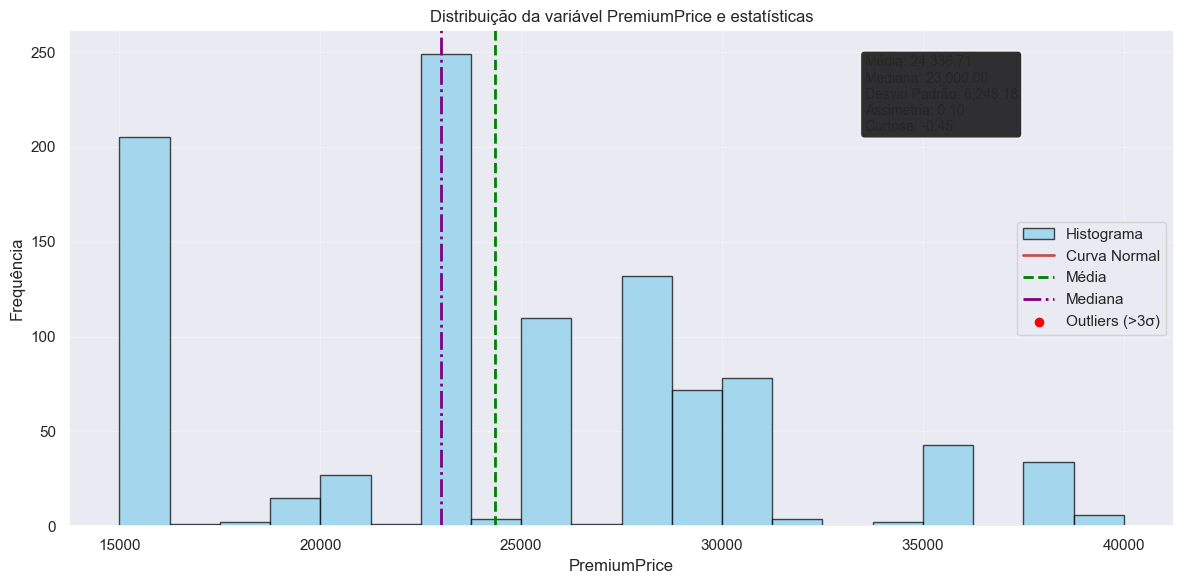

In [31]:
# Análise estatistica descritiva da variável alvo

# Garantir que não haja NaNs
data = df_dados['PremiumPrice'].dropna()

# Estatísticas principais
mu = data.mean()
std = data.std()
med = data.median()
skewness = data.skew()
kurt = data.kurtosis()

# Histograma com densidade
plt.figure(figsize=(12, 6))
count, bins, ignored = plt.hist(data, bins=20, density=False, color='skyblue',
                                 edgecolor='black', alpha=0.7, label='Histograma')

# Curva normal teórica
x = np.linspace(min(bins), max(bins), 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r-', linewidth=2, label='Curva Normal')

# Linhas da média e mediana
plt.axvline(mu, color='green', linestyle='--', linewidth=2, label='Média')
plt.axvline(med, color='purple', linestyle='-.', linewidth=2, label='Mediana')

# Outliers visuais (> 3 desvios)
outliers = data[(data < mu - 3*std) | (data > mu + 3*std)]
plt.scatter(outliers, [0]*len(outliers), color='red', zorder=5, label='Outliers (>3σ)')

# Caixa de estatísticas
stats_text = '\n'.join((
    f'Média: {mu:,.2f}',
    f'Mediana: {med:,.2f}',
    f'Desvio Padrão: {std:,.2f}',
    f'Assimetria: {skewness:.2f}',
    f'Curtose: {kurt:.2f}'
))
props = dict(boxstyle='round', facecolor='black', alpha=0.8)
plt.text(0.72, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

# Ajustes finais
plt.title('Distribuição da variável PremiumPrice e estatísticas') #com curva normal
plt.xlabel('PremiumPrice')
plt.ylabel('Frequência')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


📄 Análise Descritiva da Variável PremiumPrice

A variável PremiumPrice apresenta uma média de aproximadamente 24.336,71, enquanto a mediana é 23.000,00, indicando uma distribuição levemente assimétrica à direita (positiva), com presença de alguns valores mais altos que puxam a média para cima.

O desvio padrão é de aproximadamente 6.248,18, o que revela uma dispersão moderada em torno da média — ou seja, os preços variam de forma relativamente ampla dentro do conjunto.

A assimetria (skewness) de 0,10 confirma essa leve cauda à direita, enquanto a curtose de -0,45 indica uma distribuição mais achatada que a normal (platicúrtica), com menos concentração de valores próximos à média e caudas menos acentuadas.

Em resumo, a distribuição de PremiumPrice é quase simétrica, com leve influência de valores mais altos, e mostra uma variabilidade moderada, sem concentração excessiva no centro ou nas extremidades.

O gráfico indica possíveis outliers, esses valores devem ser analisados com cuidado pois pode influenciar negativamente modelos preditivos sensíveis a valores extremos.


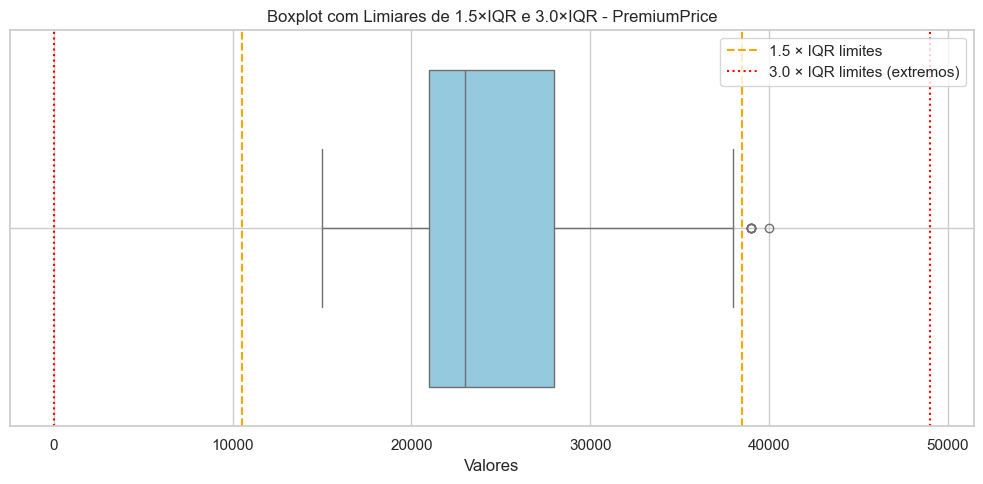

Q1: 21000.0
Q3: 28000.0
IQR (Interquartile Range): 7000.0
--------------------------------------
Limite inferior 1.5: 10500.0
Limite superior 1.5: 38500.0
--------------------------------------
Limite inferior 3: 0.0
Limite superior 3: 49000.0
--------------------------------------
Número de outliers 1.5: 6
Número de outliers 3 (extremos): 0


In [ ]:
# Verificar se a variável alvo possui outliers
resultado = analisar_outliers(df_dados, 'PremiumPrice')


📐 A visualização do Boxplot indica uma oportunidade de transformação no pré-processamento, 6 registros encontrado com outliers.

Para analisar:
- Aplicar transformação logarítmica na variável PremiumPrice para aproximar uma distribuição normal.
- Tratar ou remover outliers com base na análise de IQR (como a função que criamos anteriormente).


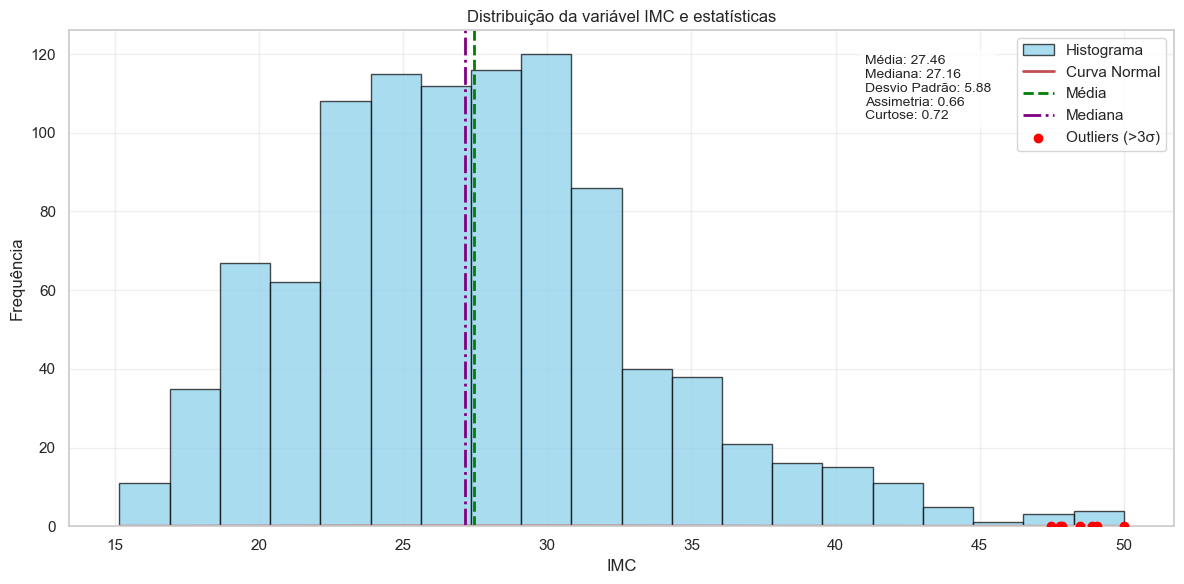

In [ ]:
# Análise estatistica descritiva da variável IMC

# Garantir que não haja NaNs
data = df_dados['imc'].dropna()

# Estatísticas principais
mu = data.mean()
std = data.std()
med = data.median()
skewness = data.skew()
kurt = data.kurtosis()

# Histograma com densidade
plt.figure(figsize=(12, 6))
count, bins, ignored = plt.hist(data, bins=20, density=False, color='skyblue',
                                 edgecolor='black', alpha=0.7, label='Histograma')

# Curva normal teórica
x = np.linspace(min(bins), max(bins), 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r-', linewidth=2, label='Curva Normal')

# Linhas da média e mediana
plt.axvline(mu, color='green', linestyle='--', linewidth=2, label='Média')
plt.axvline(med, color='purple', linestyle='-.', linewidth=2, label='Mediana')

# Outliers visuais (> 3 desvios)
outliers = data[(data < mu - 3*std) | (data > mu + 3*std)]
plt.scatter(outliers, [0]*len(outliers), color='red', zorder=5, label='Outliers (>3σ)')

# Caixa de estatísticas
stats_text = '\n'.join((
    f'Média: {mu:,.2f}',
    f'Mediana: {med:,.2f}',
    f'Desvio Padrão: {std:,.2f}',
    f'Assimetria: {skewness:.2f}',
    f'Curtose: {kurt:.2f}'
))
props = dict(boxstyle='round', facecolor='black', alpha=0.8)
plt.text(0.72, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

# Ajustes finais
plt.title('Distribuição da variável IMC e estatísticas') #com curva normal
plt.xlabel('IMC')
plt.ylabel('Frequência')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

📊 A distribuição é assimétrica à direita (cauda alongada para valores maiores), o que é comum em variáveis biométricas como IMC (Índice de Massa Corporal).

O pico de frequência está entre 25 e 30, com mais de 120 ocorrências no bin de maior densidade — o que indica que a maioria das pessoas da amostra está na faixa de sobrepeso (segundo a OMS, IMC entre 25 e 30).

📌 Possíveis outliers
Valores acima de 40 (IMC ≥ 40 é considerado obesidade grau III ou obesidade mórbida) são bem menos frequentes e aparecem como potenciais outliers.
Do lado oposto, há algumas ocorrências abaixo de 18.5 (limite inferior de IMC saudável), o que pode indicar baixo peso ou dados raros.

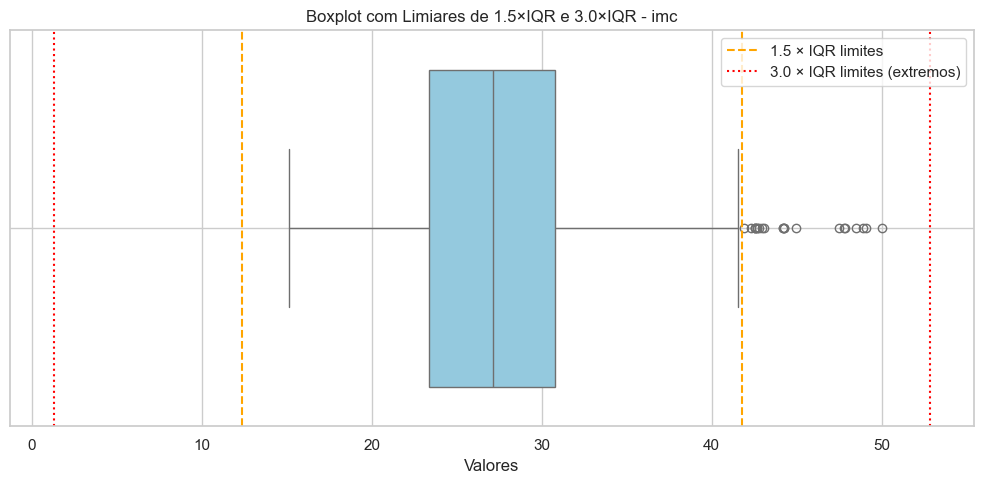

Q1: 23.393392200872924
Q3: 30.75987020010817
IQR (Interquartile Range): 7.366477999235247
--------------------------------------
Limite inferior 1.5: 12.343675202020053
Limite superior 1.5: 41.80958719896104
--------------------------------------
Limite inferior 3: 1.2939582031671826
Limite superior 3: 52.85930419781391
--------------------------------------
Número de outliers 1.5: 22
Número de outliers 3 (extremos): 0


In [ ]:
# Verificar se a variável possui outliers
resultado = analisar_outliers(df_dados, 'imc')

📐 Oportunidade para transformações estatísticas como log ou Box-Cox podem ajudar caso essa variável vá alimentar modelos sensíveis à normalidade.
Foram encontrados 22 registros com outliers.

Uma análise por categorias de IMC (baixo peso, saudável, sobrepeso, obesidade I/II/III) pode ser útil para enriquecer insights ou treinar modelos com variáveis categóricas derivadas.

In [ ]:
# Analise de significancia das variáveis categóricas x variável alvo
categorical_groups = [
    "Diabetes", "BloodPressureProblems", "AnyTransplants",
    "AnyChronicDiseases", "KnownAllergies", "HistoryOfCancerInFamily",
    "ordem_faixa", "categoria_imc"
]

resultado_testes = comparar_grupos_categoricos(df_dados, categorical_groups, "PremiumPrice")
display(resultado_testes)

,Variável,Grupos,Teste,p-valor,Resultado
0,Diabetes,"[0, 1]",Mann-Whitney U,0.0065,Significativo
1,BloodPressureProblems,"[0, 1]",Mann-Whitney U,0.0000,Significativo
2,AnyTransplants,"[0, 1]",Mann-Whitney U,0.0000,Significativo
3,AnyChronicDiseases,"[0, 1]",Mann-Whitney U,0.0000,Significativo
4,KnownAllergies,"[0, 1]",Mann-Whitney U,0.5658,Não significativo
5,HistoryOfCancerInFamily,"[0, 1]",Mann-Whitney U,0.0001,Significativo
6,ordem_faixa,"[6, 7, 5, 4]",Kruskal-Wallis,0.0000,Significativo
7,categoria_imc,"[Peso normal, Sobrepeso, Obesidade grau I, Aba...",Kruskal-Wallis,0.0080,Significativo


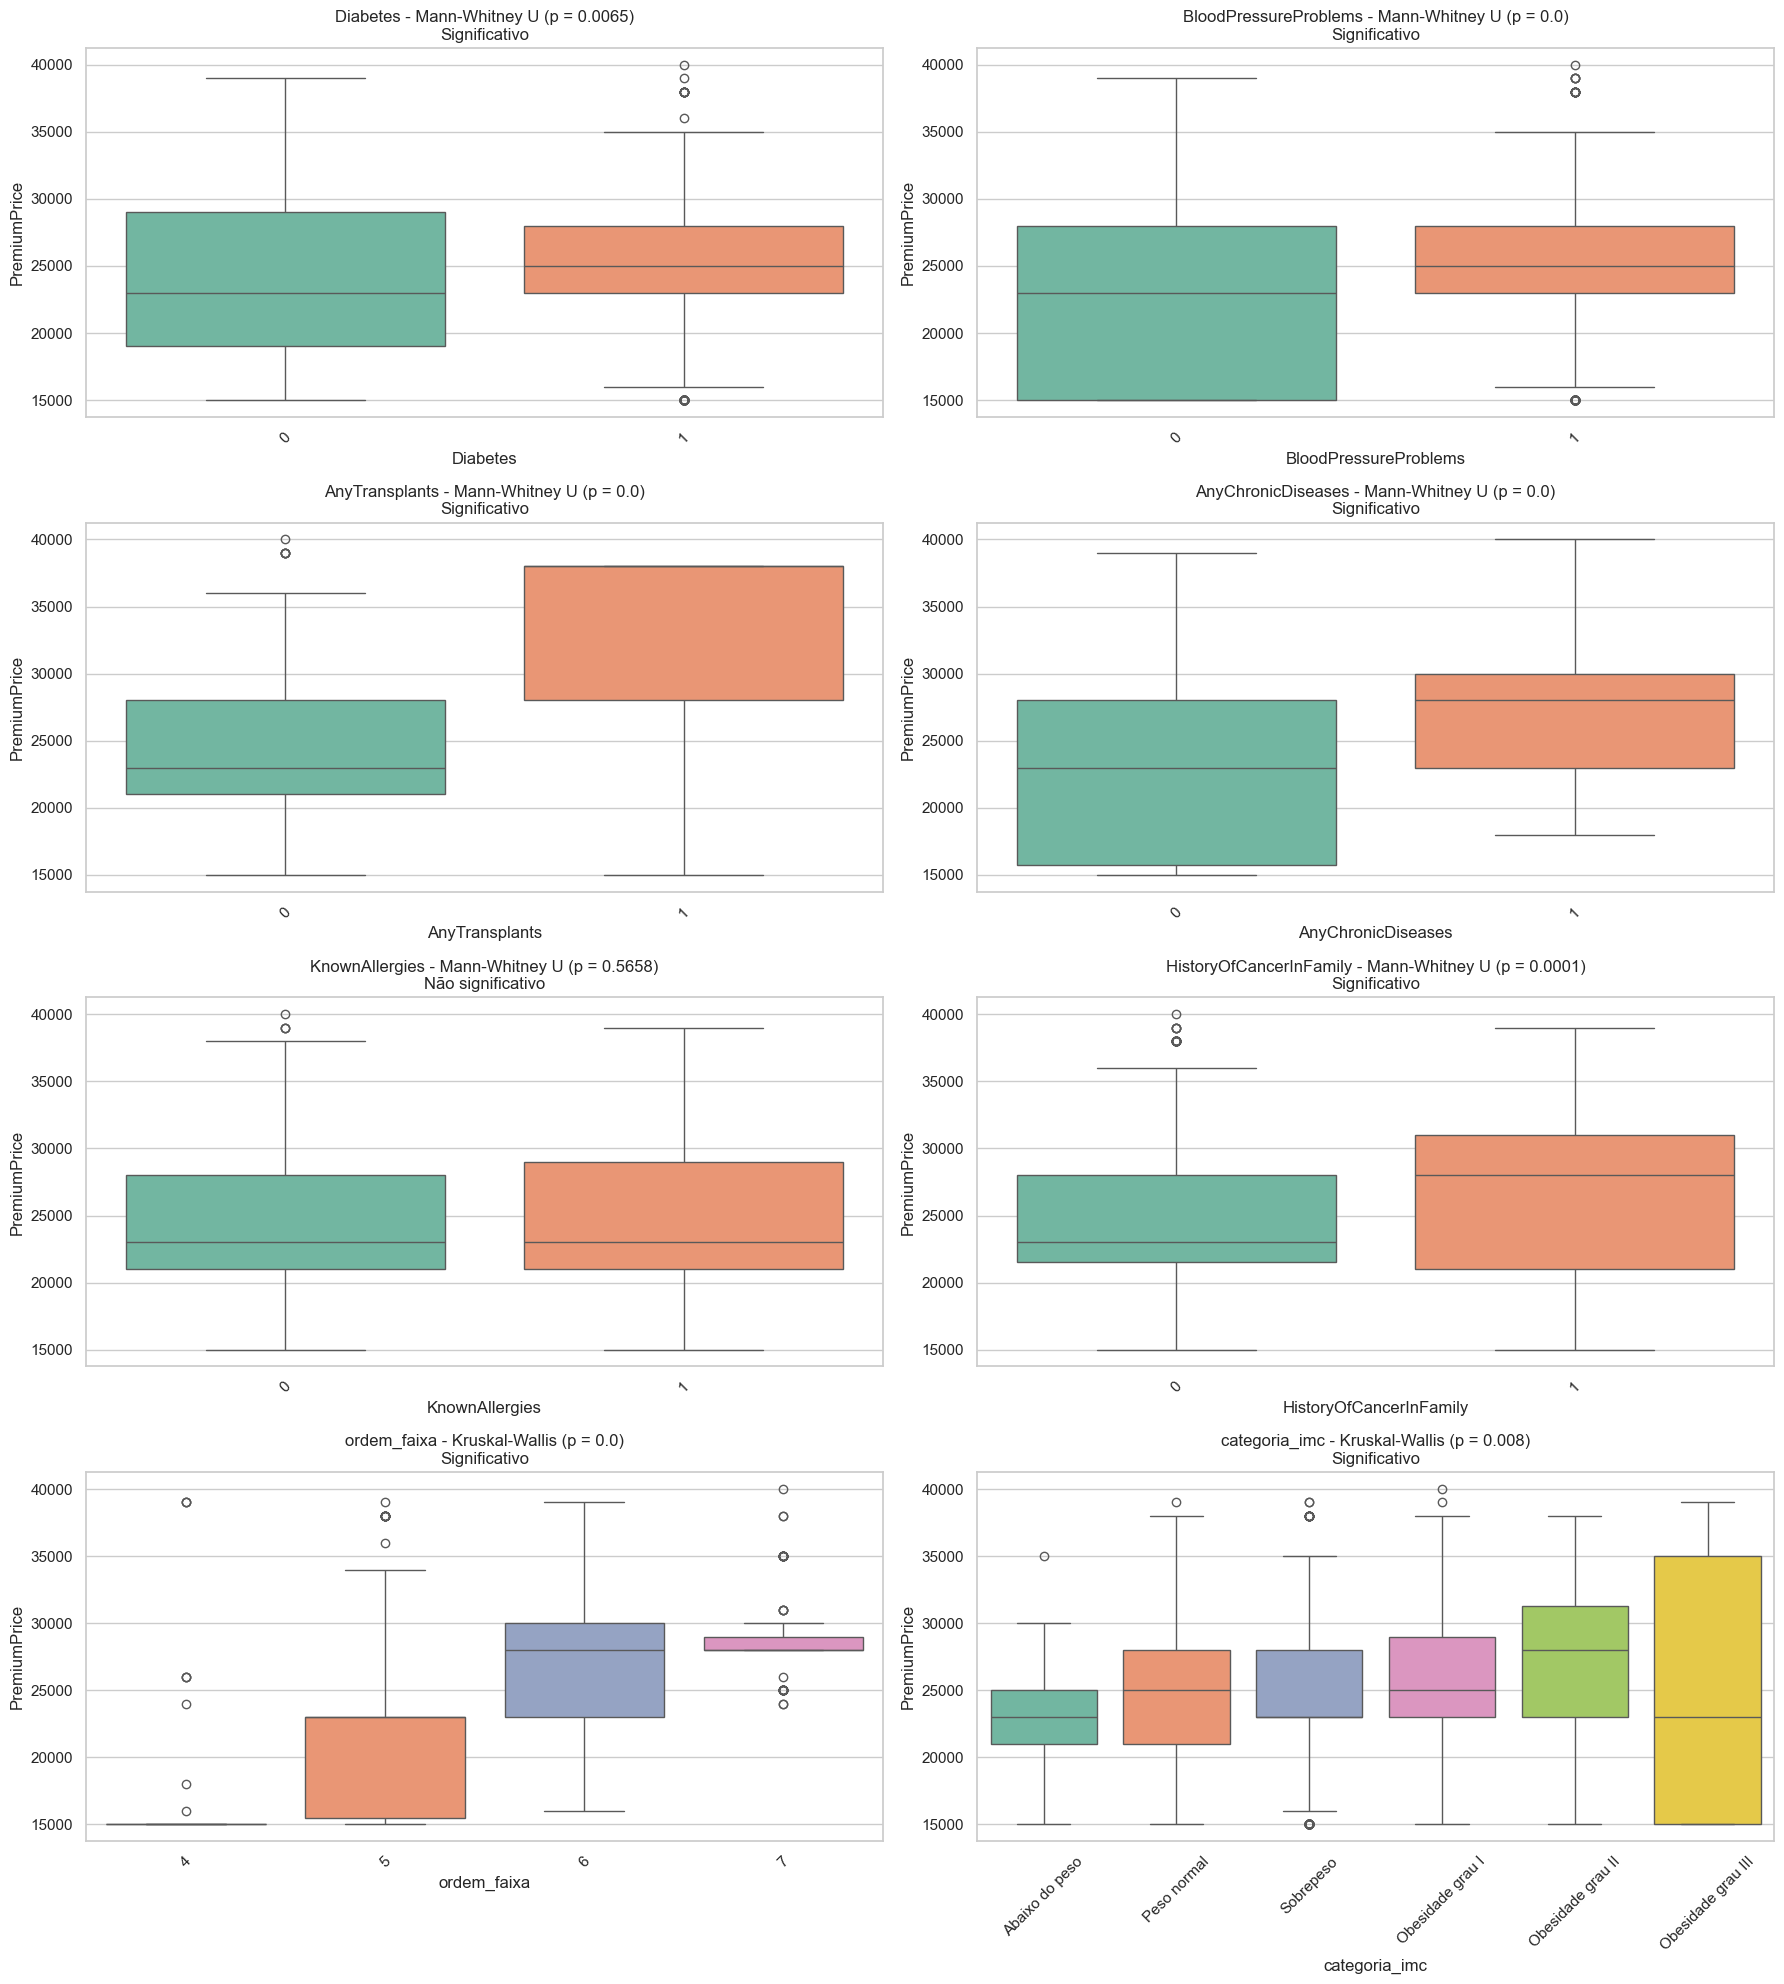

In [ ]:
# Plot do resultado
plotar_boxplots_resultados(df_dados, resultado_testes, "PremiumPrice")
plt.tight_layout()
plt.show()

📄 Análise variáveis categóricas x variável alvo

Esse resultado mostra uma análise estatística de diferença entre grupos de variáveis categóricas com relação a variável alvo contínua. Foram feitos testes não paramétricos (Mann-Whitney e Kruskal-Wallis), que são mais robustos para dados que não seguem distribuição normal.

Exceto a variável KnownAllergies com p-valor = 0.5658 maior que 0.05 se mostrou não significativa com a variável alvo, as demais variáveis apresenta diferença estatística entre os grupos, indicando que aspectos como doenças crônicas, IMC, idade/faixa e histórico de saúde influenciam fortemente o comportamento medido pela variável-alvo.


In [ ]:
# Tabela de Frequência das váriaveis categóricas
variaveis_significativas = [
    "Diabetes", "BloodPressureProblems",
    "AnyChronicDiseases", "KnownAllergies", "HistoryOfCancerInFamily",
    "faixa_etaria", "categoria_imc"
]
# Função do pandas que divide uma série numérica em quantis.
# O parâmetro q=4 quer dizer: dividir a variável PremiumPrice em 4 faixas com aproximadamente o mesmo número de observações.
df_dados['faixa_preco'] = pd.qcut(df_dados['PremiumPrice'], q=4, labels=['Baixo', 'Médio-Baixo', 'Médio-Alto', 'Alto'])
df_dados['range'] = pd.qcut(df_dados['PremiumPrice'], q=4)

print(f"\n📊 Faixa preço: {df_dados['range'].unique()}")
for var in variaveis_significativas:
    print(f"\n📊 Crosstab: {var} x faixa_preco")
    display(pd.crosstab(df_dados[var], df_dados['faixa_preco'], margins=True,margins_name="Total" ))
    
# > O desbalanceamento de classe é um problema que terá que ser resolvido durante o pré-processamento dos dados.


📊 Faixa preço: [(23000.0, 28000.0], (28000.0, 40000.0], (21000.0, 23000.0], (14999.999, 21000.0]]
Categories (4, interval[float64, right]): [(14999.999, 21000.0] < (21000.0, 23000.0] < (23000.0, 28000.0] < (28000.0, 40000.0]]

📊 Crosstab: Diabetes x faixa_preco


faixa_preco,Baixo,Médio-Baixo,Médio-Alto,Alto,Total
Diabetes,,,,,
0,171,149,103,149,572
1,79,101,144,90,414
Total,250,250,247,239,986



📊 Crosstab: BloodPressureProblems x faixa_preco


faixa_preco,Baixo,Médio-Baixo,Médio-Alto,Alto,Total
BloodPressureProblems,,,,,
0,173,144,81,126,524
1,77,106,166,113,462
Total,250,250,247,239,986



📊 Crosstab: AnyChronicDiseases x faixa_preco


faixa_preco,Baixo,Médio-Baixo,Médio-Alto,Alto,Total
AnyChronicDiseases,,,,,
0,224,220,194,170,808
1,26,30,53,69,178
Total,250,250,247,239,986



📊 Crosstab: KnownAllergies x faixa_preco


faixa_preco,Baixo,Médio-Baixo,Médio-Alto,Alto,Total
KnownAllergies,,,,,
0,195,194,213,172,774
1,55,56,34,67,212
Total,250,250,247,239,986



📊 Crosstab: HistoryOfCancerInFamily x faixa_preco


faixa_preco,Baixo,Médio-Baixo,Médio-Alto,Alto,Total
HistoryOfCancerInFamily,,,,,
0,218,249,213,190,870
1,32,1,34,49,116
Total,250,250,247,239,986



📊 Crosstab: faixa_etaria x faixa_preco


faixa_preco,Baixo,Médio-Baixo,Médio-Alto,Alto,Total
faixa_etaria,,,,,
Jovem adulto,129,0,4,3,136
Adulto,117,143,13,26,299
Meia-idade,4,107,142,163,416
Idoso,0,0,88,47,135
Total,250,250,247,239,986



📊 Crosstab: categoria_imc x faixa_preco


faixa_preco,Baixo,Médio-Baixo,Médio-Alto,Alto,Total
categoria_imc,,,,,
Abaixo do peso,11,12,12,4,39
Peso normal,90,65,110,54,319
Sobrepeso,78,97,74,76,325
Obesidade grau I,49,50,36,68,203
Obesidade grau II,9,19,10,26,64
Obesidade grau III,13,7,5,11,36
Total,250,250,247,239,986


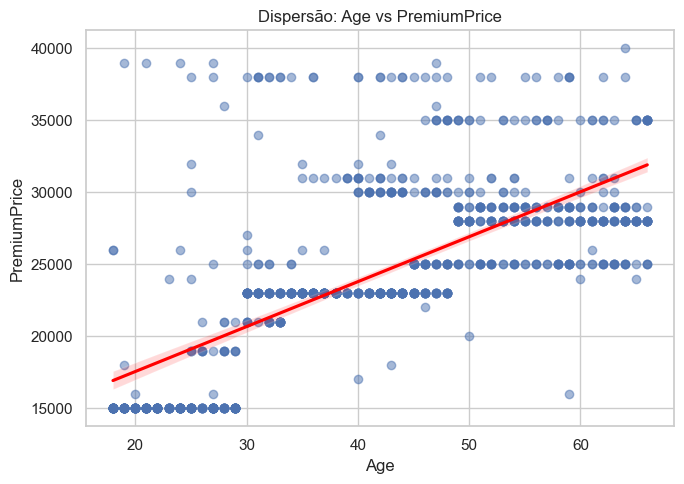

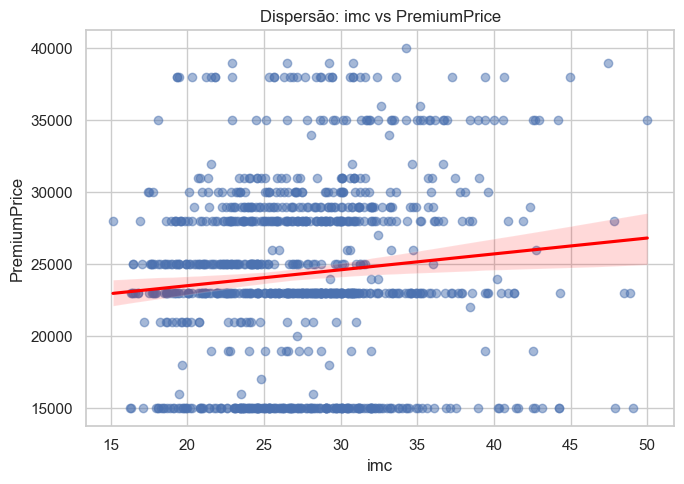

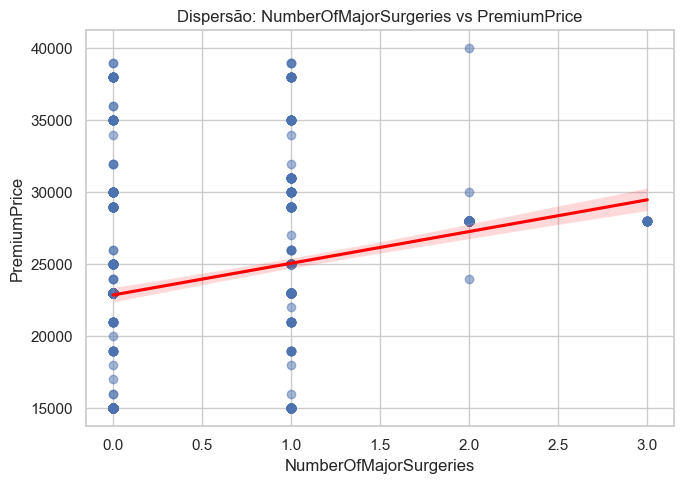

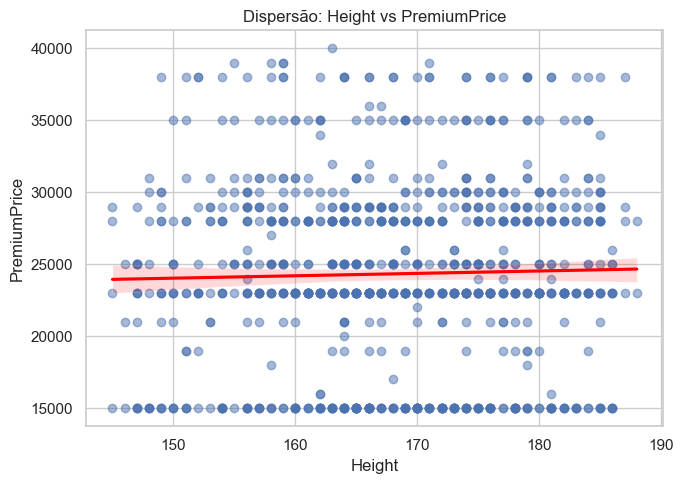

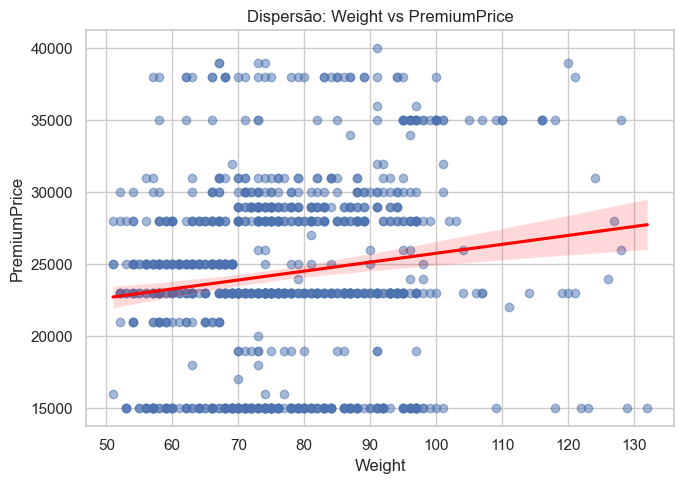

,variavel,pearson_r,pearson_p,spearman_r,spearman_p
0,Age,0.6975,0.0000,0.7391,0.0000
1,imc,0.1038,0.0011,0.0979,0.0021
2,NumberOfMajorSurgeries,0.2642,0.0000,0.2895,0.0000
3,Height,0.0269,0.3986,0.0231,0.4682
4,Weight,0.1415,0.0000,0.1293,0.0000


In [ ]:
# Analisar as correlações com as variáveis quantitativas
variaveis = ['Age', 'imc', 'NumberOfMajorSurgeries','Height','Weight']  
resultado_corr = analisar_correlacoes_com_target(df_dados, variaveis, 'PremiumPrice', exibir_graficos=True)
display(resultado_corr)

⚠️ Conclusão:

* O coeficiente de correlação r diz o quão forte é a relação. Correlação positiva perfeita (+1), negativa perfeita (-1) e 0 nenhuma correlação.
* O p-valor significância estatística diz o quanto podemos confiar que a relação existe no geral. Um p-valor pequeno (geralmente < 0.05) indica que é muito improvável que aquela correlação tenha surgido por acaso.
  
Uma análise robusta olha os dois juntos:
* Primeiro: Verifica se o r é alto o bastante para ser interessante.
* Depois: Confirma se o p-valor é baixo o suficiente para dizer que essa relação é estatisticamente confiável.


| Variável                  | Correlação (r) | p-valor | Interpretação                    |
|---------------------------|----------------|---------|----------------------------------|
| Age                       | 0.6975         | 0.0000  | Correlação forte e significativa |
| imc                       | 0.1038         | 0.0011  | Correlação fraca, mas significativa |
| NumberOfMajorSurgeries    | 0.2642         | 0.0000  | Correlação moderada e significativa |
| Height                    | 0.0269         | 0.3986  | Sem correlação significativa     |
| Weight                    | 0.1415         | 0.0000  | Correlação fraca e significativa |


In [ ]:
# Plotar o heatmap
#variaveis = ['Age', 'imc', 'NumberOfMajorSurgeries','Height','Weight']
#plotar_heatmap_correlacoes(df_dados, variaveis, target='PremiumPrice')


In [ ]:
# Salvando o dataset 
df_dados.to_csv('dados/dados_projeto.csv', index = False)

<span style="color: black; font-size: 30px;">4 - Modelagem </span>
* Construção, teste e validação para diferentes modelos. A modelagem pode ser estatística (quando o interesse é em compreender o relacionamento entre os dados) ou preditiva (quando o interesse é em fazer previsões).
* Para este projeto vamos trabalhar na modelagem preditiva e criaremos diferentes modelos, sendo cada modelo com sua própria abordagem de cálculos e estatísticas.


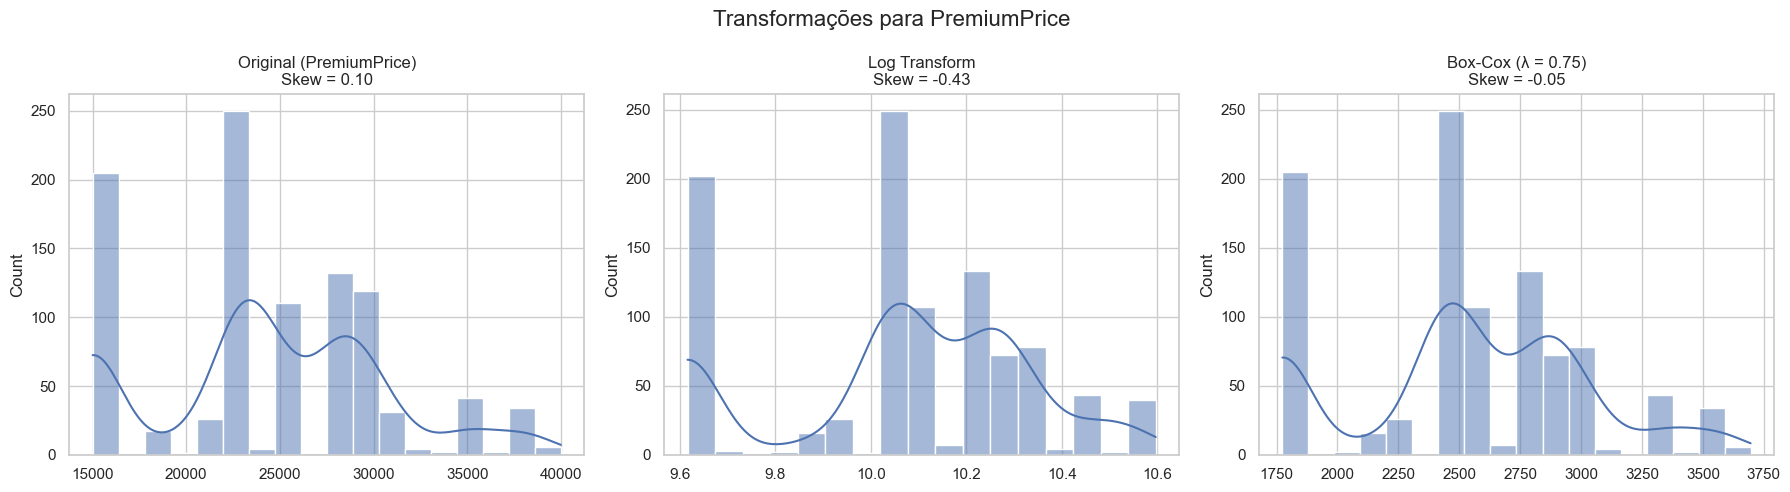

,original,boxcox,log
0,25000,2600.102569,10.126631
1,29000,2905.489685,10.275051
2,23000,2442.837412,10.043249
3,28000,2830.197215,10.239960
4,23000,2442.837412,10.043249


In [ ]:
# Função de transformação log natural e box_cox
resultado = transformar_variavel(df_dados['PremiumPrice'], nome_variavel="PremiumPrice")

# Acessar versões transformadas
df_transformacao = pd.DataFrame(
    {
        'original': np.array(resultado['original']),
        'boxcox':  np.array(resultado['boxcox']),
        'log': np.array(resultado['log'])
    }
)

df_dados['boxcox'] = df_transformacao['boxcox']
df_dados['log'] = df_transformacao['log']
df_transformacao.head()


<span style="color: black; font-size: 30px;">6 - Deploy do Modelo </span>
* Aqui usamos o modelo final com novos dados para então resolver o problema para o qual ele foi criado.

<span style="color: black; font-size: 30px;"> FIM </span>